In [53]:
import mnist_reader 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from skimage import io

from matplotlib.colors import LogNorm
%matplotlib inline
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal    



from IPython.display import Video
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler



In [2]:
#importting data from tf.keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(Xtrain, Ytrain), (Xtest, Ytest) = fashion_mnist.load_data()

In [61]:

#scaling training data set 
Xtrain = Xtrain/ 255.0
Xtest= Xtest / 255.0


Xmean = Xtrain.mean(axis=0)
# Substract means
Xtrn_nm = Xtrain - Xmean
Xtst_nm = Xtest - Xmean
reshapedXtrain = Xtrn_nm.reshape(60000, 784)

pca = PCA(n_components=2)
X_scaled = StandardScaler().fit_transform(reshapedXtrain)
X = pca.fit_transform(X_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
def plot_k_means(X, cluster_assignments, centroid_locations):
    plt.figure(figsize=(6, 6))
    plt.viridis() # Set colour map
    plt.scatter(X[:, 0], X[:, 1], s=20, c=cluster_assignments, alpha=0.8) # plot data points
    plt.scatter(centroid_locations[:, 0], centroid_locations[:, 1], s=200, marker='x', c=range(K), edgecolors='k') # plot centroids
    plt.show()
    

In [18]:
def plot_GMM_density(X, gmm):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:, 0], X[:, 1], s=20, c='b', alpha=0.8)
    x = np.linspace(-5., 8., 1000)
    y = np.linspace(-2., 10., 1000)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX).reshape(X.shape)
    plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, np.max(np.log(Z)), 20))
    plt.show()
    
def plot_GMM_mixture_components(X, gmm):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:, 0], X[:, 1], s=20, c='b', alpha=0.8)
    x = np.linspace(-5., 8., 1000)
    y = np.linspace(-2., 10., 1000)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    
    colours = ['red', 'green', 'purple']
    
    for i in range(K):
        mean, covariance = gmm.means_[i], gmm.covariances_[i]
        gaussian = multivariate_normal(mean, covariance)
        Z = -gaussian.logpdf(XX).reshape(X.shape)
        plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 1, 4), colors=colours[i])
    plt.show()


In [ ]:
def plot_GMM_EM_mixture(X, gmm):
    

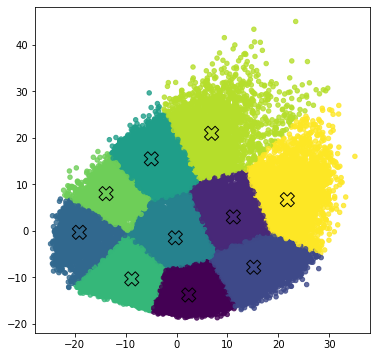

In [62]:
K=10
#implementing k means to get a starting point
kmeans = KMeans(K, init='random').fit(X)
cluster_assignments = kmeans.predict(X)
centroid_locations = kmeans.cluster_centers_

plot_k_means(X, cluster_assignments, centroid_locations)


(60000,)


/Users/nikilchandrasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

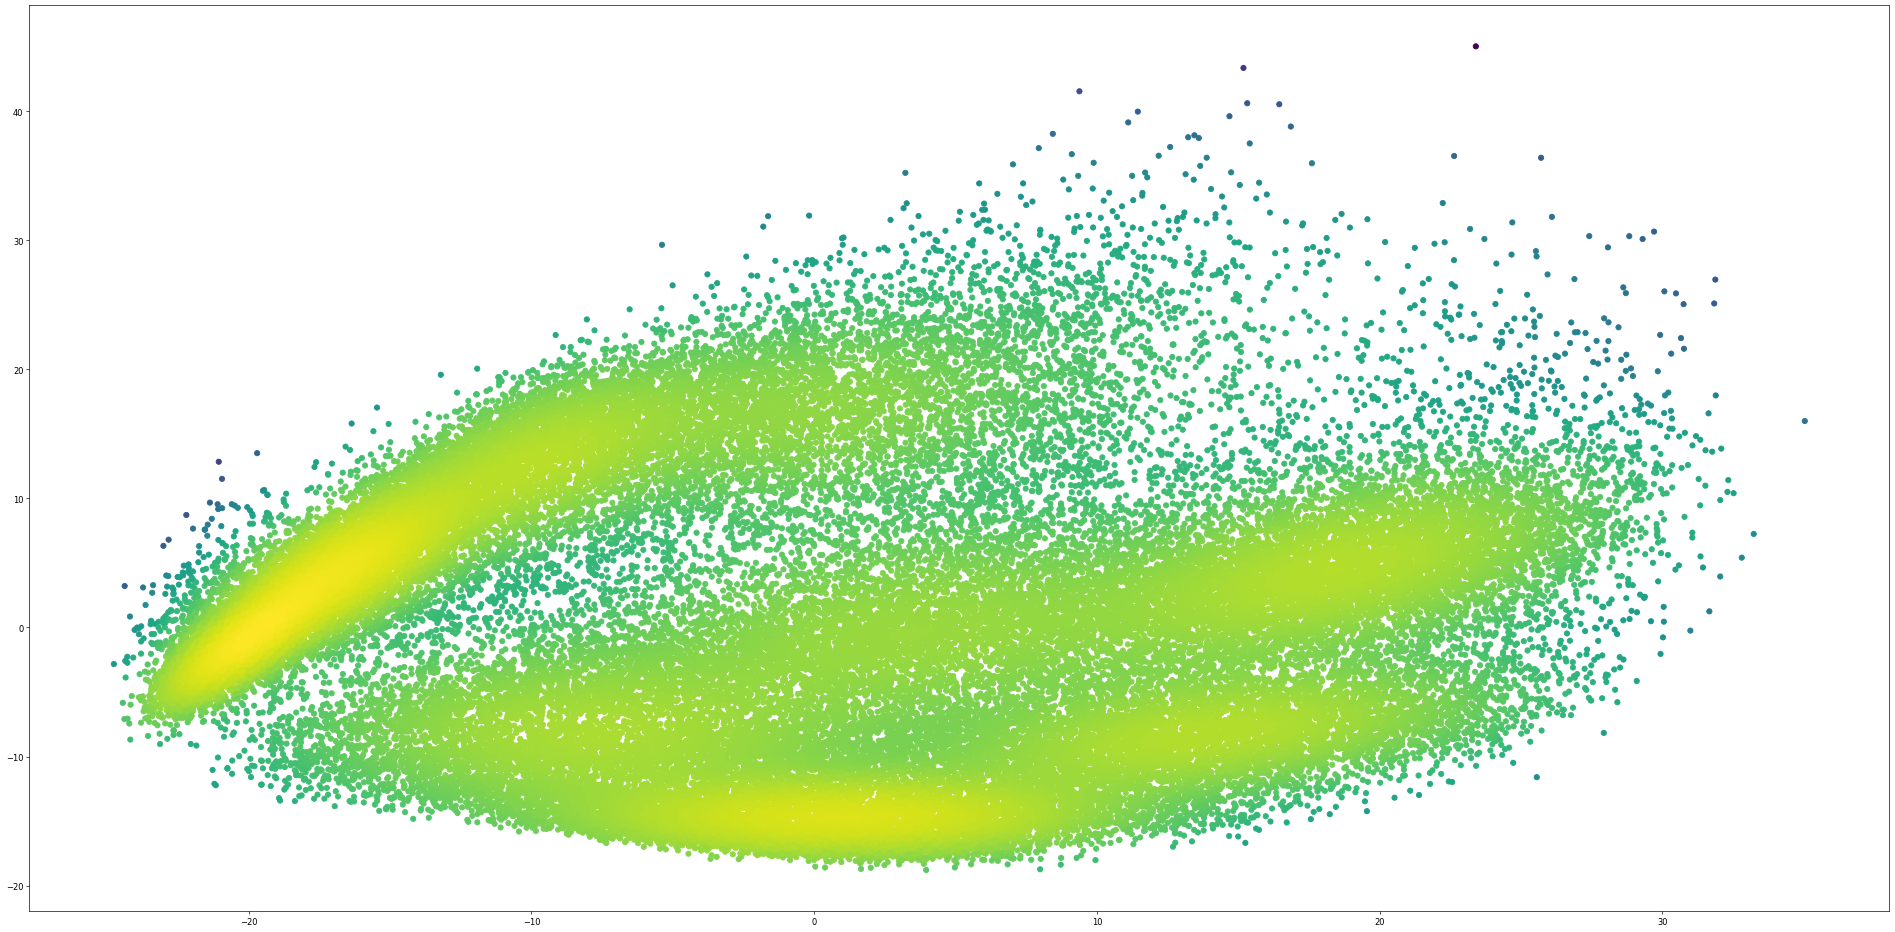

<Figure size 640x480 with 0 Axes>

In [80]:

gmm = GaussianMixture(n_components=K, max_iter=10, warm_start=True, init_params= 'kmeans')
gmm.fit(X)
probs = gmm.score_samples(X)
probs = gmm.predict_proba(X)
print (probs.shape)


#based on probabilites for each gaussian have a function that plots points 

#have a for loop going through each datapoint
#for i in range (60000):
    
    #for each datapoint call a function with respective datapoints probability densities
#
# colour=['blue', 'green', 'cyan','black','yellow','purple','red','magenta','brow','pink']
figure(figsize=(40, 20), dpi=60)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=probs, s=40, cmap='viridis');



#size = 50 * probs.max(1) ** 2  # square emphasizes differences
figure(figsize=(8, 6), dpi=80)
#plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);


#print(np.sum(pdarray,axis=1))

#pdarray.shape




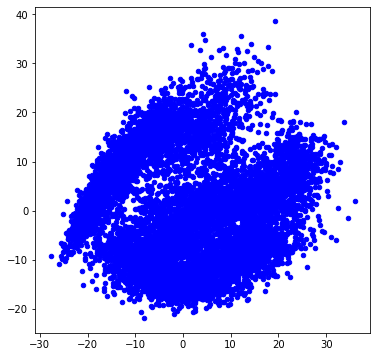

In [48]:
X_samples, _ = gmm.sample(n_samples=10000)

plt.figure(figsize=(6, 6))
plt.scatter(X_samples[:, 0], X_samples[:, 1], s=20, c='b')
plt.show()